# Lab: Maps

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# import data
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

raw_eqk.head(2)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake


In [6]:
# preliminary exploration
raw_eqk.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [7]:
raw_eqk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   id         120108 non-null  object 
 6   place      120108 non-null  object 
 7   type       120108 non-null  object 
dtypes: float64(4), object(4)
memory usage: 7.3+ MB


### Data Selection

In [4]:
# unique values for types of earthquakes
print(raw_eqk.type.unique())

['earthquake' 'quarry blast' 'quarry' 'mining explosion' 'rock burst'
 'explosion' 'landslide' 'sonicboom' 'sonic boom' 'anthropogenic event'
 'acoustic noise']


In [10]:
# Select only data with with type equal to ‘earthquake’ 
# and magnitude greater than or equal to 6.5.
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]

### GeoDataFrame

In [11]:
eqk = gpd.GeoDataFrame(eqk, # data
                        # specify geometry column
                        geometry=gpd.points_from_xy(eqk.longitude, 
                                                    eqk.latitude),
                        # specify CRS
                        crs='EPSG:4326')

<AxesSubplot:>

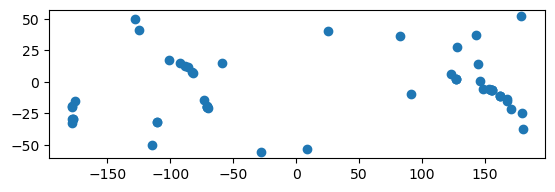

In [12]:
eqk.plot()

## Import low-resolution countries polygons

In [13]:
# import countries polygons
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Map

<AxesSubplot:title={'center':'Earthquakes of magnitude >= 6.5 in 2014'}>

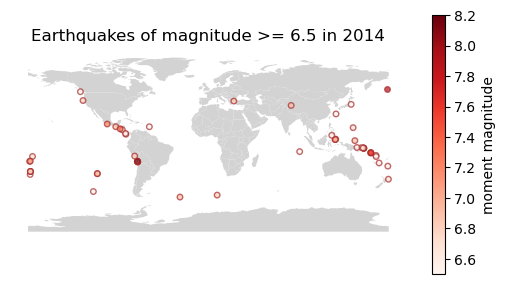

In [55]:
fig, ax = plt.subplots()

# remove axes
ax.axis('off')

# set title
ax.set_title('Earthquakes of magnitude >= 6.5 in 2014')

# plot countries
worldmap.plot(ax = ax,
             color = 'lightgray')

# plot earthquakes
eqk.plot(ax = ax,
        column = 'mag',
        legend = True,
        markersize = 16,
        cmap = 'Reds',
        alpha = 0.7,
        edgecolor = 'brown',
        # shrink and title legend
        legend_kwds = {'label': 'moment magnitude',
                      'shrink' : 0.7})
